In [1]:
#import the package "Pandas" into Jupyter Notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#You need to tell which column of the csv file you want to set as index
oil = pd.read_csv('stock_tables/crude-oil-daily.csv', index_col=0, parse_dates=True)
gold = pd.read_csv('stock_tables/gold-daily.csv',index_col=0, parse_dates=True)

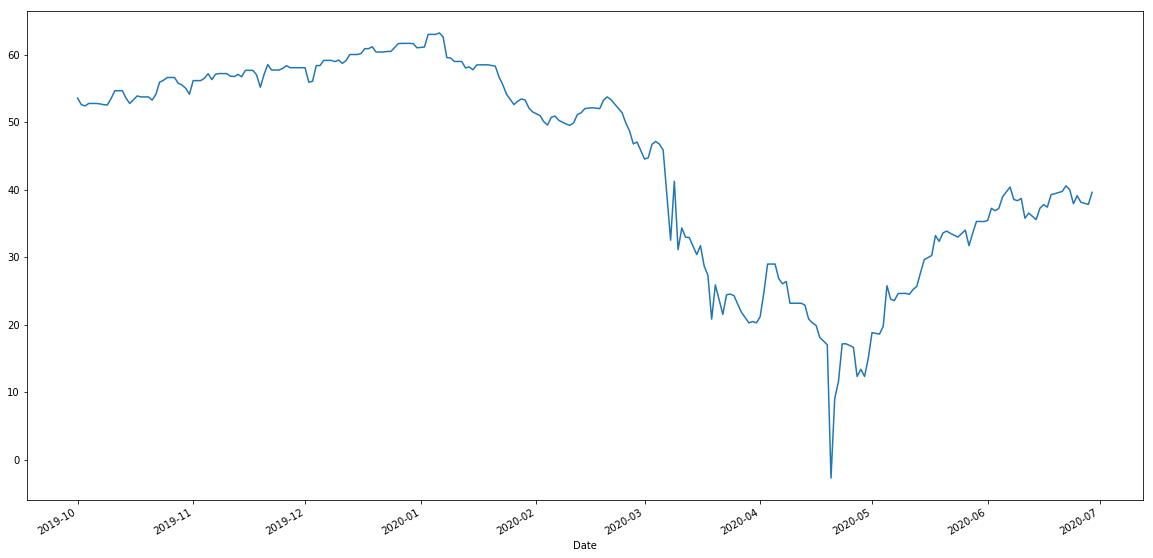

In [3]:
#filling the NaN spaces
oil = oil.fillna(method='ffill', limit=2)
oil.loc[:,'Close'].plot(figsize=(20,10))

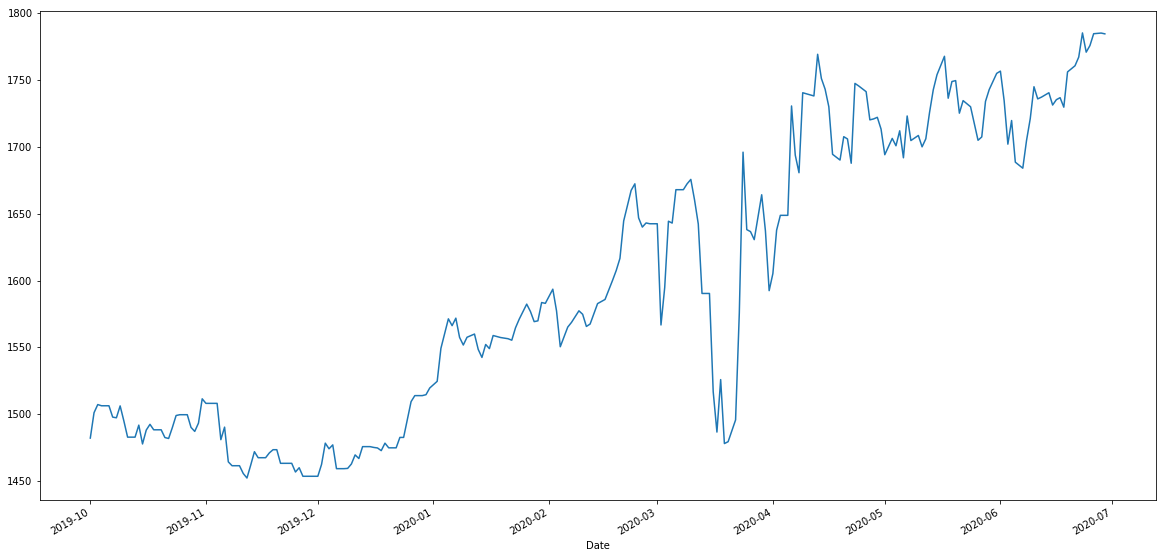

In [4]:
#filling the NaN spaces
gold = gold.fillna(method='ffill', limit=2)
gold.loc[:,'Close'].plot(figsize=(20,10))

In [5]:
#oil.head()
#gold.head()

In [6]:
#CREATE NEW COLUMN
#this column will have the price of the following day (day0 becomes day1)
oil['Price1'] = oil['Close'].shift(-1)
gold['Price1'] = gold['Close'].shift(-1)

#Price difference 
oil['Pricediff'] = oil['Price1'] - oil['Close']
#Price difference 
gold['Pricediff'] = gold['Price1'] - gold['Close']

#Daily Return 
oil['Return'] = oil['Pricediff']/oil['Close']
#Daily Return 
gold['Return'] = gold['Pricediff']/gold['Close']

#oil.head()

# Moving averages
Moving averages are used and discussed quite commonly by technical analysts and traders alike. If you’ve never heard of a moving average, it is likely you have at least seen one in practice. A moving average can help an analyst filter noise and create a smooth curve from an otherwise noisy curve. It is important to note moving averages lag because they are based on historical data, not current price.

In [7]:
#what is shift(1) - to shift the wholle column downward by one row
#hence the shift(1) Close price in fact is a Close price of yesterday
#hence the shift(2) Close price in fact is a Close price of 2 days ago
#(first 2 values are NaN, we do not have data before that)

#'Moving average' signal is the loading average price over a defined number of days
#random fluctuation - smooth out noise - in order to find out the trend 
#We want to calculate the moving average of close price over three days
oil['Average3'] = (oil['Close'] + oil['Close'].shift(1) + oil['Close'].shift(2))/3
gold['Average3'] = (gold['Close'] + gold['Close'].shift(1) + gold['Close'].shift(2))/3

#PREDIFINED FORMULA FOR 'Moving Average'
oil['MA10'] = oil['Close'].rolling(10).mean()
oil['MA30'] = oil['Close'].rolling(30).mean()
#PREDIFINED FORMULA FOR 'Moving Average'
gold['MA10'] = gold['Close'].rolling(10).mean()
gold['MA30'] = gold['Close'].rolling(30).mean()

#oil.head()
#oil.tail()

In [8]:
#PLOTTING USING '.plot()'
#oil.loc[:,'High'].plot()
#oil['Price1'].plot(legend=True)

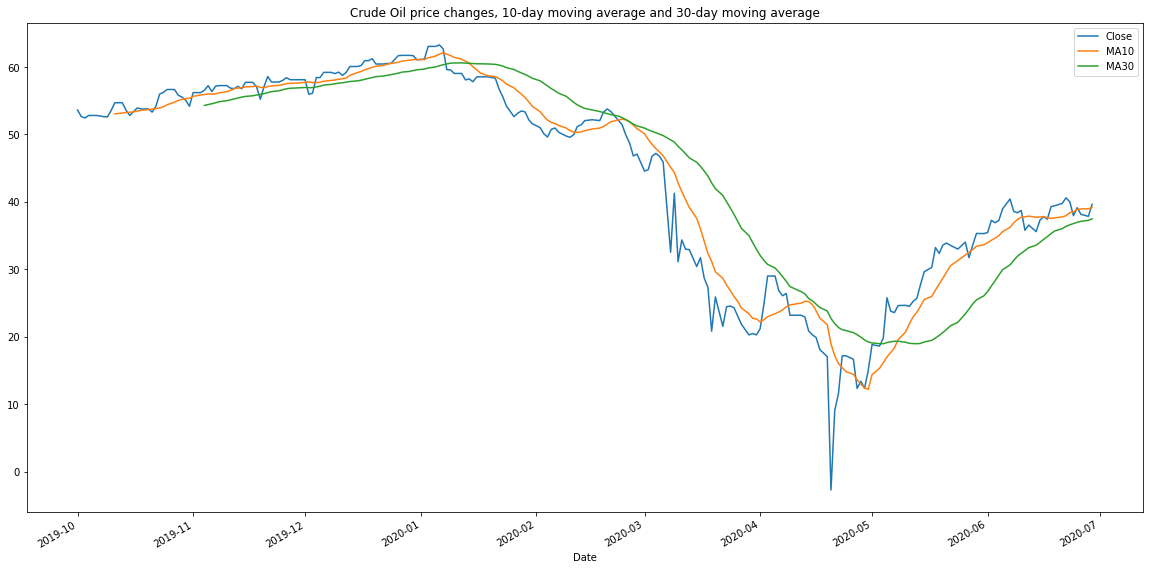

In [12]:
#Plot the moving averages with the Close price
plt.title("Crude Oil price changes, 10-day moving average and 30-day moving average")
oil['Close'].plot(legend=True, figsize=(20,10))
oil['MA10'].plot(legend=True, figsize=(20,10)) #FAST SIGNAL
oil['MA30'].plot(legend=True, figsize=(20,10)) #SLOW SIGNAL

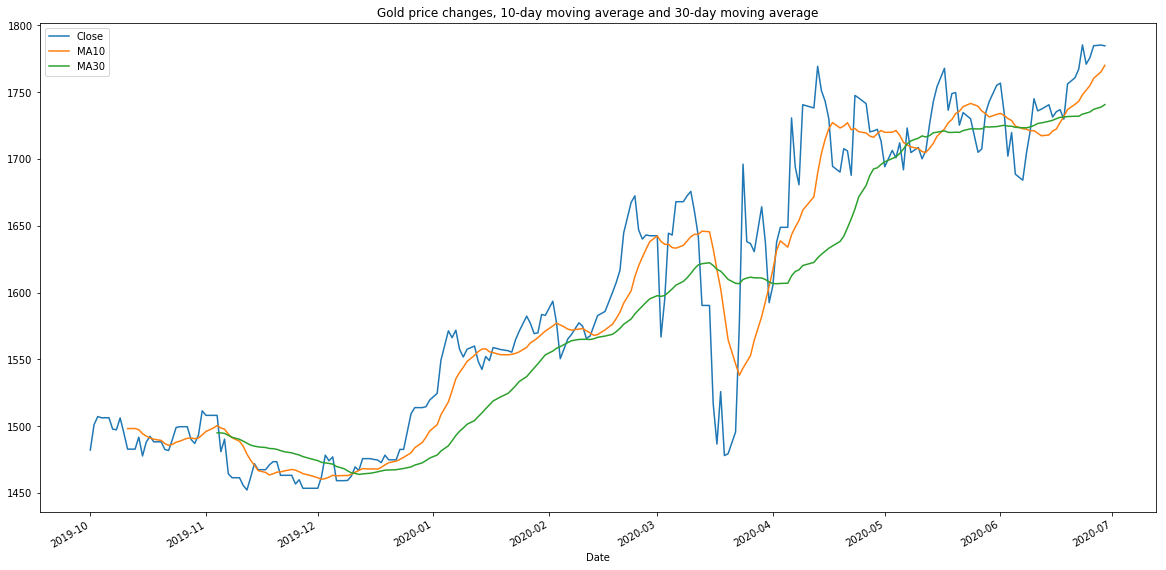

In [13]:
plt.title("Gold price changes, 10-day moving average and 30-day moving average")
gold['Close'].plot(legend=True, figsize=(20,10))
gold['MA10'].plot(legend=True, figsize=(20,10)) #FAST SIGNAL
gold['MA30'].plot(legend=True, figsize=(20,10)) #SLOW SIGNAL